<a href="https://colab.research.google.com/github/vijaynadimpalli/MelbourneHousingDataAnalysis/blob/main/MelbournHouseAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from tensorflow import keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Region -> Coucil Area -> pincode -> suburb.....

1) I think initially remove region,pincode and binary categorise others and see results.. then we can experiment....

2) done the above and ran model with 3 dense layers and dropout...results not great explained variance score of 0.66...i think we are hurt by top 1%values as seen from plot...can try removing them by creating a new df such as df1...

3) added code for removing top 5%,  explained variance score increased to 0.7...next try improving the model

learnings from andrew...

increase your layers a lot (try different optimizations, learning rate etc) .... try to overfit on training data first...and then do regularization to fit to test set.... 

also random intialzations are important...

for hyperparmeter tuning learning rate is most important and then layers and nodes can be changed.......
and do random searching to find best hyperparams...
alos try batch normalzations...
also if you have lots of data, increase your training data split to 0.99.....

also early stopping is pretty difficult to get right bcause it chaneges both train and test accuracy simultaneously...

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip = zipfile.ZipFile('/content/drive/My Drive/NEW_DATASCIENCE_PROJECTS/TensorFlow_FILES.zip')
zip.extractall()
df = pd.read_csv('/content/TensorFlow_FILES/DATA/melb_data.csv')
pd.set_option('display.max_columns',500)

In [ ]:
#adding code for removing top 5% of data according to price
df.drop(df["Price"].sort_values(ascending=False).iloc[0:int(0.05*df.shape[0])].index,inplace=True)
df.shape

(12901, 21)

In [ ]:
df.drop(['BuildingArea','YearBuilt'],axis=1,inplace=True)

In [ ]:
df.drop(df[df['Car'].isna()].index,inplace=True)

In [ ]:
df['CouncilArea'].value_counts().count()

33

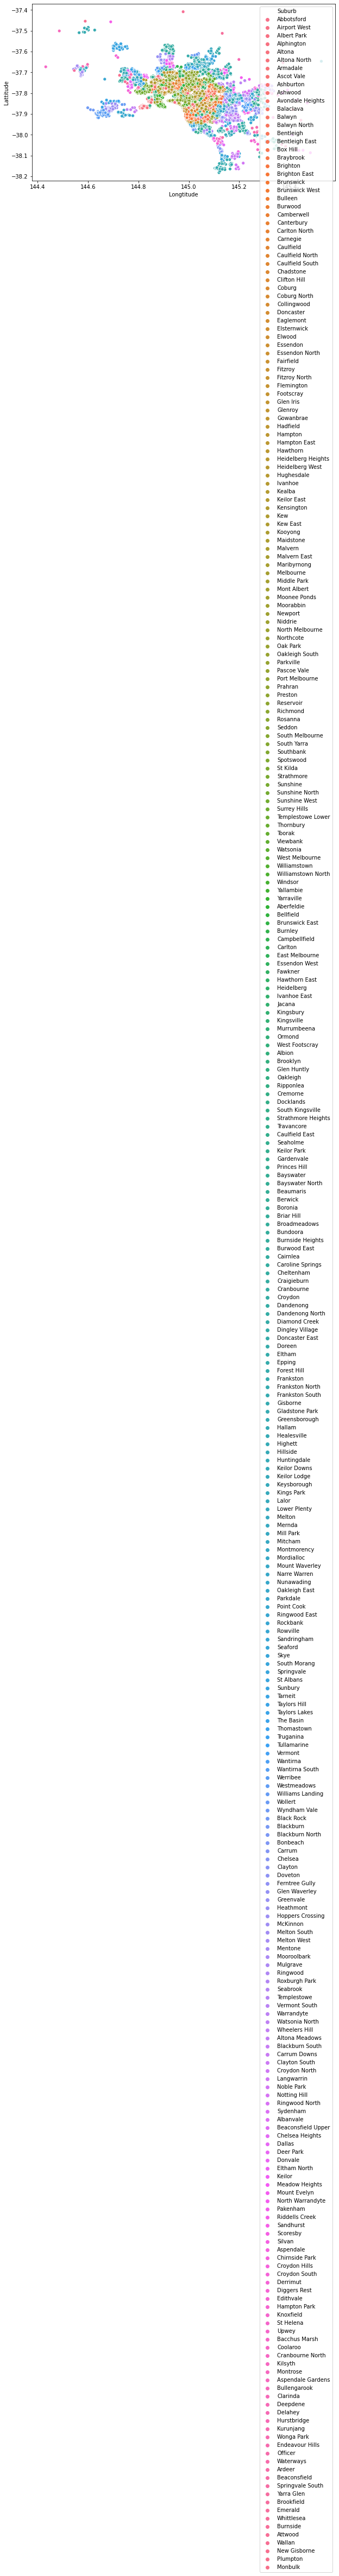

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(y='Lattitude',x='Longtitude',data=df,hue='Suburb')

In [ ]:
df['Suburb'].value_counts().count()

314

In [ ]:
!pip install category_encoders

In [ ]:
import category_encoders as ce

In [ ]:
bin_encoder = ce.BinaryEncoder()
enc_data = bin_encoder.fit_transform(df['Suburb'])
enc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12842 entries, 0 to 13579
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Suburb_0  12842 non-null  int64
 1   Suburb_1  12842 non-null  int64
 2   Suburb_2  12842 non-null  int64
 3   Suburb_3  12842 non-null  int64
 4   Suburb_4  12842 non-null  int64
 5   Suburb_5  12842 non-null  int64
 6   Suburb_6  12842 non-null  int64
 7   Suburb_7  12842 non-null  int64
 8   Suburb_8  12842 non-null  int64
 9   Suburb_9  12842 non-null  int64
dtypes: int64(10)
memory usage: 1.1 MB


In [ ]:
df = pd.concat([df,enc_data],axis=1)

In [ ]:
df.drop(['Address'],axis=1,inplace=True)

In [ ]:
#plt.figure(figsize=(10,6))
#sns.scatterplot(y='Lattitude',x='Longtitude',data=df,hue='Regionname')

In [ ]:
df.drop(['Regionname'],axis=1,inplace=True)

In [ ]:
df['Suburb'].value_counts().count()

314

In [ ]:
pd.set_option('display.max_rows',500)

In [ ]:
bin_encoder = ce.BinaryEncoder()
enc_data = bin_encoder.fit_transform(df['CouncilArea'])
df = pd.concat([df,enc_data],axis=1)

In [ ]:
df.drop(['Suburb','Postcode','CouncilArea'],axis=1,inplace=True)

In [ ]:
df['Type'].value_counts()

h    8728
u    3012
t    1102
Name: Type, dtype: int64

In [ ]:
df = pd.concat([df,pd.get_dummies(df['Type'],drop_first=True)],axis=1)
df.drop('Type',axis=1,inplace=True)

In [ ]:
df['Method'].value_counts()

S     8564
SP    1658
PI    1453
VB    1078
SA      89
Name: Method, dtype: int64

In [ ]:
df = pd.concat([df,pd.get_dummies(df['Method'],drop_first=True)],axis=1)
df.drop('Method',axis=1,inplace=True)

In [ ]:
df['SellerG'].value_counts().count()

265

In [ ]:
bin_encoder = ce.BinaryEncoder()
enc_data = bin_encoder.fit_transform(df['SellerG'])
df = pd.concat([df,enc_data],axis=1)
df.drop('SellerG',axis=1,inplace=True)

In [ ]:
df['Date'].value_counts()

27/05/2017    447
3/06/2017     378
12/08/2017    357
17/06/2017    356
27/11/2016    334
29/07/2017    332
4/03/2017     319
24/06/2017    316
22/07/2017    313
25/02/2017    311
8/07/2017     309
10/12/2016    296
15/07/2017    289
15/10/2016    285
18/03/2017    279
12/11/2016    272
8/04/2017     270
1/07/2017     267
3/12/2016     267
19/11/2016    249
8/10/2016     247
20/05/2017    246
18/06/2016    243
28/05/2016    243
13/05/2017    236
7/05/2016     235
24/09/2016    233
17/09/2016    230
28/08/2016    225
16/09/2017    224
23/09/2017    223
10/09/2016    217
26/08/2017    216
29/04/2017    210
16/04/2016    210
27/06/2016    205
4/06/2016     199
22/05/2016    197
3/09/2017     194
3/09/2016     193
7/11/2016     186
14/05/2016    185
9/09/2017     182
22/08/2016    181
19/08/2017    181
30/07/2016    165
6/08/2016     146
16/07/2016    141
6/05/2017     136
22/04/2017    131
26/07/2016    129
13/08/2016    122
23/04/2016     98
11/02/2017     83
12/06/2016     43
11/03/2017

In [ ]:
df['Date'].apply(lambda x : str.split(x,sep='/',maxsplit=1)[1]).value_counts().index.sort_values()

Index(['01/2016', '02/2016', '02/2017', '03/2017', '04/2016', '04/2017',
       '05/2016', '05/2017', '06/2016', '06/2017', '07/2016', '07/2017',
       '08/2016', '08/2017', '09/2016', '09/2017', '10/2016', '11/2016',
       '12/2016'],
      dtype='object')

In [ ]:
df['Date_new'] = df['Date'].apply(lambda x : str.split(x,sep='/',maxsplit=1)[1])
df['Date_new']

0        12/2016
1        02/2016
2        03/2017
3        03/2017
4        06/2016
          ...   
13574    08/2017
13575    08/2017
13576    08/2017
13577    08/2017
13579    08/2017
Name: Date_new, Length: 12842, dtype: object

In [ ]:
df['Date_new'].replace(['01/2016', '02/2016', '03/2016', '04/2016', '05/2016','06/2016', '07/2016',
       '08/2016', '09/2016', '10/2016', '11/2016',
       '12/2016','01/2017', '02/2017', '03/2017', '04/2017', '05/2017','06/2017', '07/2017',
       '08/2017', '09/2017', '10/2017', '11/2017',
       '12/2017'],np.arange(0,24,1),inplace=True)

In [ ]:
df.drop('Date',inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12842 entries, 0 to 13579
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          12842 non-null  int64  
 1   Price          12842 non-null  float64
 2   Distance       12842 non-null  float64
 3   Bedroom2       12842 non-null  float64
 4   Bathroom       12842 non-null  float64
 5   Car            12842 non-null  float64
 6   Landsize       12842 non-null  float64
 7   Lattitude      12842 non-null  float64
 8   Longtitude     12842 non-null  float64
 9   Propertycount  12842 non-null  float64
 10  Suburb_0       12842 non-null  int64  
 11  Suburb_1       12842 non-null  int64  
 12  Suburb_2       12842 non-null  int64  
 13  Suburb_3       12842 non-null  int64  
 14  Suburb_4       12842 non-null  int64  
 15  Suburb_5       12842 non-null  int64  
 16  Suburb_6       12842 non-null  int64  
 17  Suburb_7       12842 non-null  int64  
 18  Suburb

In [ ]:
df.columns

Index(['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'Lattitude', 'Longtitude', 'Propertycount', 'Suburb_0', 'Suburb_1',
       'Suburb_2', 'Suburb_3', 'Suburb_4', 'Suburb_5', 'Suburb_6', 'Suburb_7',
       'Suburb_8', 'Suburb_9', 'CouncilArea_0', 'CouncilArea_1',
       'CouncilArea_2', 'CouncilArea_3', 'CouncilArea_4', 'CouncilArea_5',
       'CouncilArea_6', 't', 'u', 'S', 'SA', 'SP', 'VB', 'SellerG_0',
       'SellerG_1', 'SellerG_2', 'SellerG_3', 'SellerG_4', 'SellerG_5',
       'SellerG_6', 'SellerG_7', 'SellerG_8', 'SellerG_9', 'Date_new'],
      dtype='object')

In [ ]:
df.drop(['Suburb_0', 'Suburb_1',
       'Suburb_2', 'Suburb_3', 'Suburb_4', 'Suburb_5', 'Suburb_6', 'Suburb_7',
       'Suburb_8', 'Suburb_9','SellerG_0',
       'SellerG_1', 'SellerG_2', 'SellerG_3', 'SellerG_4', 'SellerG_5',
       'SellerG_6', 'SellerG_7', 'SellerG_8', 'SellerG_9'],axis=1,inplace=True)

In [ ]:
#Starting modelling part

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
y = df['Price'].values
X = df.drop('Price',axis=1).values

In [ ]:
y=np.expand_dims(y,axis=1)

In [ ]:
print(X.shape)
print(y.shape)

(12842, 23)
(12842, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=101)

In [ ]:
print(X_test.shape)
print(y_train.shape)

(2569, 23)
(10273, 1)


In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense

In [ ]:
# model = Sequential()
# model.add(Dense(43,activation='relu'))
# model.add(Dense(20,activation='relu'))
# model.add(Dense(10,activation='relu'))
# model.add(Dense(1,activation='linear'))

In [ ]:
# model.compile(loss='mse',optimizer='adam')

In [ ]:
# model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=300)

In [ ]:
# output = pd.DataFrame(model.history.history)

In [ ]:
#plt.figure(figsize=(10,6))
# output.plot(figsize=(10,6))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

In [ ]:
# model = Sequential()
# model.add(Dense(43,activation='relu'))
# model.add(Dense(20,activation='relu'))
# model.add(Dense(10,activation='relu'))
# model.add(Dense(1,activation='linear'))

# model.compile(loss='mse',optimizer='adam')

# stopper = EarlyStopping(monitor='loss',mode='min')


# model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1000,callbacks=[stopper])

In [ ]:
# output = pd.DataFrame(model.history.history)
# output.plot(figsize=(10,6))

# y_pred = model.predict(X_test)
# print(np.sqrt(mean_squared_error(y_test,y_pred))/np.mean(y_test))
# print((model.predict(np.expand_dims(X_test[0,:],axis=0)) - y_test[0])/y_test[0])

In [ ]:
# model = Sequential()
# model.add(Dense(43,activation='relu'))
# model.add(Dropout(0.2))
#model.add(Dense(20,activation='relu'))
#model.add(Dropout(0.2))
# model.add(Dense(20,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(10,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1,activation='linear'))

# model.compile(loss='mse',optimizer='adam')

# stopper = EarlyStopping(monitor='loss',mode='min')


# model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=300,callbacks=[])

In [ ]:
# ##output = pd.DataFrame(model.history.history)
# #output.plot(figsize=(10,6))

# y_pred = model.predict(X_test)
# print(np.sqrt(mean_squared_error(y_test,y_pred))/np.mean(y_test))
# print(mean_absolute_error(y_test,y_pred)/np.mean(y_test))
# print((model.predict(np.expand_dims(X_test[0,:],axis=0)) - y_test[0])/y_test[0])

# print(explained_variance_score(y_test,y_pred))

# plt.figure(figsize=(10,6))
# plt.scatter(y_test,y_pred)
# plt.plot(y_test,y_test,'r')


read this for why validation loss is less than traning loss.... https://www.pyimagesearch.com/2019/10/14/why-is-my-validation-loss-lower-than-my-training-loss

In [ ]:
# model = Sequential()
# model.add(Dense(43,activation='relu'))
# #model.add(Dropout(0.2))
# model.add(Dense(30,activation='relu'))
# #model.add(Dropout(0.2))
# model.add(Dense(20,activation='relu'))
# #model.add(Dropout(0.2))
# model.add(Dense(10,activation='relu'))
# #model.add(Dropout(0.2))
# model.add(Dense(1,activation='linear'))

# adam_opt = keras.optimizers.Adam()


# model.compile(loss='mse',optimizer=adam_opt)



# model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size = 128, epochs=1000)

In [ ]:
# output = pd.DataFrame(model.history.history)
# output.plot(figsize=(10,6))

# y_pred = model.predict(X_test)
# print(np.sqrt(mean_squared_error(y_test,y_pred))/np.mean(y_test))
# print(mean_absolute_error(y_test,y_pred)/np.mean(y_test))
# print((model.predict(np.expand_dims(X_test[0,:],axis=0)) - y_test[0])/y_test[0])

# print(explained_variance_score(y_test,y_pred))

# plt.figure(figsize=(10,6))
# plt.scatter(y_test,y_pred)
# plt.plot(y_test,y_test,'r')


1) best till now is no dropouts and 400 epochs(0.74,edge of overfitting) or using two dropouts and increasing lr...(not much overfitting going on for aggresive dropouts.. maybe increasing layers will help)

2)try making changes to above in batch_size...okay adding batch size to 128(1000 epoch),improved to 0.75...


3)making a copy below and increase layers....trying to generate overfitting and using dropout(maybe this approach will improve validation loss)

In [ ]:
# def build_model(learning_rate=0.01):
#   model = Sequential()
#   model.add(Dense(43,activation='relu'))
#   #model.add(Dropout(0.2))
#   model.add(Dense(30,activation='relu'))
#   #model.add(Dropout(0.2))
#   model.add(Dense(30,activation='relu'))
#   #model.add(Dropout(0.2))
#   model.add(Dense(20,activation='relu'))
#   #model.add(Dropout(0.2))
#   model.add(Dense(20,activation='relu'))
#   #model.add(Dropout(0.2))
#   model.add(Dense(10,activation='relu'))
#   #model.add(Dropout(0.2))
#   model.add(Dense(10,activation='relu'))
#   #model.add(Dropout(0.2))
#   model.add(Dense(1,activation='linear'))

#   adam_opt = keras.optimizers.Adam(learning_rate=learning_rate)
#   model.compile(loss='mse',optimizer=adam_opt)

#   return model


# def run_model(model,batch_size=32,epochs=500): 
#   output = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size)
#   return output

# def pred_model(model):
#   y_pred = model.predict(X_test)
#   print("Mean absolute error on test data : " + mean_absolute_error(y_test,y_pred)/np.mean(y_test))
#   print("Explained variance score : " + explained_variance_score(y_test,y_pred))

In [ ]:
# fig = plt.figure(figsize=(20,12))
# ax = fig.add_axes([0,0,1,1])

# for batch_size in [32,64,128,256]:
#   model = build_model()
#   output = pd.DataFrame(run_model(model,batch_size,500).history)
#   ax.plot(output['loss'],label='batch_size: ' + str(batch_size))

# ax.legend()


batch size = 32 works best from above plots, so lets fix that....

In [ ]:
# fig = plt.figure(figsize=(20,12))
# ax = fig.add_axes([0,0,1,1])

# for learning_rate in 1/(10**np.array([2,5])):
#   model = build_model(learning_rate)
#   output = pd.DataFrame(run_model(model,32,1000).history)
#   ax.plot(output['loss'],label='learning_rate: ' + str(learning_rate))

# ax.legend()
# #took 3126sec to run


#0.01 best, 0.001 very near to this... 1e-05 might become better for higher epochs graph is still decreasing
#after further analysis 0.01 is the best

In [ ]:
# def build_model1(learning_rate=0.01):
#   model = Sequential()
#   model.add(Dense(43,activation='relu'))
#   #model.add(Dropout(0.2))
#   model.add(Dense(30,activation='relu'))
#   #model.add(Dropout(0.2))
#   model.add(Dense(30,activation='relu'))
#   #model.add(Dropout(0.2))
#   model.add(Dense(20,activation='relu'))
#   #model.add(Dropout(0.2))
#   model.add(Dense(20,activation='relu'))
#   #model.add(Dropout(0.2))
#   model.add(Dense(10,activation='relu'))
#   #model.add(Dropout(0.2))
#   model.add(Dense(10,activation='relu'))
#   #model.add(Dropout(0.2))
#   model.add(Dense(1,activation='linear'))

#   adam_opt = keras.optimizers.Adam(learning_rate=learning_rate)
#   model.compile(loss='mse',optimizer=adam_opt)

#   return model


# def build_model2(learning_rate=0.01):
#   model = Sequential()

#   model.add(Dense(43,activation='relu'))
#   #model.add(Dropout(0.2))
#   model.add(Dense(43,activation='relu'))
#   #model.add(Dropout(0.2))
#   model.add(Dense(43,activation='relu'))
#   #model.add(Dropout(0.2))

#   model.add(Dense(30,activation='relu'))
#   #model.add(Dropout(0.2))
#   model.add(Dense(30,activation='relu'))
#   #model.add(Dropout(0.2))
#   model.add(Dense(30,activation='relu'))
#   #model.add(Dropout(0.2))

#   model.add(Dense(20,activation='relu'))
#   #model.add(Dropout(0.2))
#   model.add(Dense(20,activation='relu'))
#   #model.add(Dropout(0.2))
#   model.add(Dense(20,activation='relu'))
#   #model.add(Dropout(0.2))

#   model.add(Dense(10,activation='relu'))
#   #model.add(Dropout(0.2))
#   model.add(Dense(10,activation='relu'))
#   #model.add(Dropout(0.2))
#   model.add(Dense(10,activation='relu'))
#   #model.add(Dropout(0.2))

#   model.add(Dense(1,activation='linear'))

#   adam_opt = keras.optimizers.Adam(learning_rate=learning_rate)
#   model.compile(loss='mse',optimizer=adam_opt)

#   return model


# def run_model(model,batch_size=32,epochs=500): 
#   output = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size)
#   return output

# def pred_model(model):
#   y_predt = model.predict(X_train)
#   y_pred = model.predict(X_test)
#   print("Mean absolute error on train data : " + str(mean_absolute_error(y_train,y_predt)/np.mean(y_train)))
#   print("Mean absolute error on test data : " + str( mean_absolute_error(y_test,y_pred)/np.mean(y_test)))
#   print("Explained variance score : " + str(explained_variance_score(y_test,y_pred)))

In [ ]:
# model1 = build_model1()
# model2 = build_model2()

# output1 = pd.DataFrame(run_model(model1,32,500).history)
# output2 = pd.DataFrame(run_model(model2,32,500).history)

# fig = plt.figure(figsize=(15,9))
# ax = fig.add_axes([0,0,1,1])
# ax.plot(output1['loss'],label='model1 train loss')
# ax.plot(output1['val_loss'],label='model1 val loss')
# ax.plot(output2['loss'],label='model2 train loss')
# ax.plot(output2['val_loss'],label='model2 val loss')

# ax.legend()

# pred_model(model1)
# pred_model(model2)

# # Epoch 500/500 for model 1
# # 322/322 [==============================] - 1s 3ms/step - loss: 25474516992.0000 - val_loss: 61662670848.0000
# # Epoch 500/500 for model 2
# # 322/322 [==============================] - 1s 3ms/step - loss: 20885041152.0000 - val_loss: 70583590912.0000

# # Mean absolute error on train data : 0.12662718581905336
# # Mean absolute error on test data : 0.1761936940416728
# # Explained variance score : 0.7136439903300432
# # Mean absolute error on train data : 0.12050627855589531
# # Mean absolute error on test data : 0.2089594364308416
# # Explained variance score : 0.5923630527498299




model2 doesn't look too promising .... lets add dropout to model1 and proceed to minimise variance....

In [ ]:
def build_model1(learning_rate=0.01):
  model = Sequential()
  model.add(Dense(23,activation='relu'))
  model.add(Dense(23,activation='relu'))
  model.add(Dense(23,activation='relu'))
  model.add(Dense(23,activation='relu'))
  model.add(Dense(20,activation='relu'))
  model.add(Dense(20,activation='relu'))
  model.add(Dense(20,activation='relu'))
  model.add(Dense(20,activation='relu'))
  model.add(Dense(20,activation='relu'))
  model.add(Dense(20,activation='relu'))
  model.add(Dense(15,activation='relu'))
  model.add(Dense(15,activation='relu'))
  model.add(Dense(15,activation='relu'))
  model.add(Dense(15,activation='relu'))
  model.add(Dense(15,activation='relu'))
  model.add(Dense(15,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(1,activation='linear'))

  adam_opt = keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(loss='mse',optimizer=adam_opt)

  return model


def run_model(model,batch_size=32,epochs=500): 
  output = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size)
  return output

def pred_model(model):
  y_predt = model.predict(X_train)
  y_pred = model.predict(X_test)
  print("Mean absolute error on train data : " + str(mean_absolute_error(y_train,y_predt)/np.mean(y_train)))
  print("Mean absolute error on test data : " + str( mean_absolute_error(y_test,y_pred)/np.mean(y_test)))
  print("r2_score on train data : " + str(r2_score(y_train,y_predt)))
  print("r2_score on test data : " + str(r2_score(y_test,y_pred)))
  print("Explained variance score : " + str(explained_variance_score(y_test,y_pred)))

Epoch 1/500
81/81 [==============================] - 1s 9ms/step - loss: 1135994339328.0000 - val_loss: 980530692096.0000
Epoch 2/500
81/81 [==============================] - 1s 7ms/step - loss: 292637048832.0000 - val_loss: 208659791872.0000
Epoch 3/500
81/81 [==============================] - 1s 7ms/step - loss: 183139762176.0000 - val_loss: 169303162880.0000
Epoch 4/500
81/81 [==============================] - 1s 7ms/step - loss: 150029516800.0000 - val_loss: 136337416192.0000
Epoch 5/500
81/81 [==============================] - 1s 7ms/step - loss: 123293114368.0000 - val_loss: 112852787200.0000
Epoch 6/500
81/81 [==============================] - 1s 7ms/step - loss: 106097025024.0000 - val_loss: 101028782080.0000
Epoch 7/500
81/81 [==============================] - 1s 7ms/step - loss: 95884959744.0000 - val_loss: 90806812672.0000
Epoch 8/500
81/81 [==============================] - 1s 7ms/step - loss: 85779783680.0000 - val_loss: 85067776000.0000
Epoch 9/500
81/81 [================

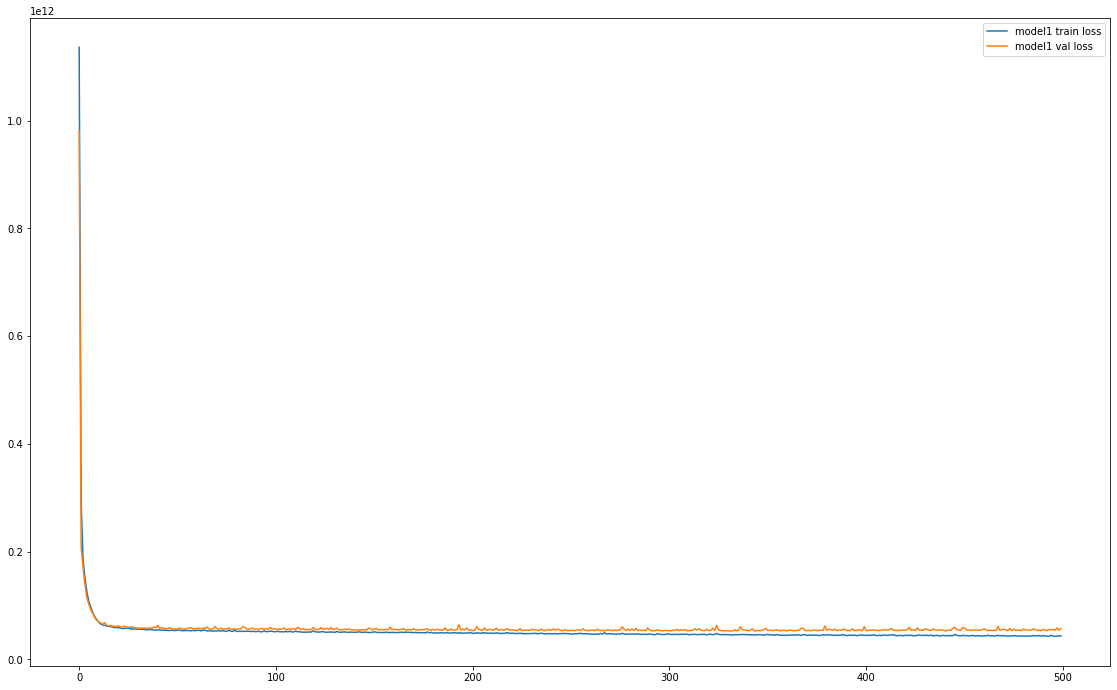

In [ ]:
model1 = build_model1(0.001)

output1 = pd.DataFrame(run_model(model1,128,500).history)

fig = plt.figure(figsize=(15,9))
ax = fig.add_axes([0,0,1,1])
ax.plot(output1['loss'],label='model1 train loss')
ax.plot(output1['val_loss'],label='model1 val loss')

ax.legend()

pred_model(model1)

128 batch size looks much better and runs about 4 times faster than 32 for the new model with dropout...so basically for every layer change you need to run hyperparameters again....

this basically implies random or grid search needs to be done

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

GBRT = GradientBoostingRegressor(max_depth=2, n_estimators=120)
GBRT.fit(X_train, y_train)

errors = [mean_squared_error(y_test, y_pred)
         for y_pred in GBRT.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)

GBRT_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators)
GBRT_best.fit(X_train, y_train)
y_pred = GBRT_best.predict(X_test)

# Display
print('Gradient Boosting Regressor')
print('\nR-squared training set:')
print(GBRT_best.score(X_train, y_train))

print('\nR-squared test set:')
print(GBRT_best.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Regressor

R-squared training set:
0.7429604620973269

R-squared test set:
0.7501651297570262


it's in the data... create a new notebook and try improving your data cleaning